# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [2]:
genome_ids = ['HG03136', 'HG03193', 'HG03343', 'HG02973', 'HG03105', 'HG03132', 'HG02974', 'HG03279', 'HG03159', 'HG03198', 'HG02953', 'HG03117', 'HG03111', 'HG03518', 'HG03199', 'HG03124', 'HG02977', 'HG03352', 'HG02952', 'HG03354', 'HG02981', 'HG03139', 'HG03118', 'HG02923', 'HG03342', 'HG03108', 'HG03112', 'HG03311', 'HG03120', 'HG03126', 'HG03294', 'HG03517', 'HG03304', 'HG03301', 'HG02976', 'HG03351', 'HG03175', 'HG03265', 'HG03372', 'HG03295', 'HG03280', 'HG03168', 'HG03202', 'HG03499', 'HG03133', 'HG02970', 'HG03109', 'HG03115', 'HG03171', 'HG03366', 'HG03300', 'HG03369', 'HG03121', 'HG02979', 'HG03190', 'HG03514', 'HG03099', 'HG03189', 'HG02944', 'HG03303', 'HG03127', 'HG03271', 'HG03520', 'HG03103', 'HG03163', 'HG02922', 'HG03100', 'HG03195', 'HG03297', 'HG02968', 'HG03291', 'HG03114', 'HG02943', 'HG03268', 'HG03298', 'HG03160', 'HG03370', 'HG03166', 'HG03129', 'HG03363', 'HG03511', 'HG03267', 'HG03521', 'HG02946', 'HG02971', 'HG03515', 'HG03169', 'HG03162', 'HG03196', 'HG03172', 'HG03157', 'HG03123', 'HG03130', 'HG02947', 'HG02938', 'HG03135', 'HG03313', 'HG03270', 'HG03367', 'HG02941']

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [4]:
root_dir = join(Path.home(),"cp_als/populations")

In [5]:
infile = join(root_dir,"output/ESN/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/ESN/all.csv'

In [6]:
df = pd.read_csv(infile)

In [7]:
df = df[genome_ids + ['gene']]
df.head()

,HG03136,HG03193,HG03343,HG02973,HG03105,HG03132,HG02974,HG03279,HG03159,HG03198,...,HG03123,HG03130,HG02947,HG02938,HG03135,HG03313,HG03270,HG03367,HG02941,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,TARDBP
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,TARDBP
2,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,TARDBP
3,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,TARDBP
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,1,TARDBP


## Computer variant count per gene and per genome

In [8]:
sdf=df.groupby(["gene"]).sum()

In [9]:
sdf.head()

,HG03136,HG03193,HG03343,HG02973,HG03105,HG03132,HG02974,HG03279,HG03159,HG03198,...,HG03157,HG03123,HG03130,HG02947,HG02938,HG03135,HG03313,HG03270,HG03367,HG02941
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,55,4,46,42,10,20,34,4,17,35,...,12,33,22,11,7,14,47,27,23,6
ANG,4,5,3,9,4,1,4,5,9,9,...,6,4,5,11,5,4,13,9,5,8
ATXN2,25,112,161,177,166,21,19,168,183,16,...,151,166,162,20,166,166,168,163,155,10
C19ORF12,19,15,20,15,22,17,22,12,13,18,...,12,12,15,43,15,23,53,53,18,18
C9ORF72,32,28,3,24,25,26,27,17,32,18,...,29,12,35,27,30,34,14,17,11,38


## Compute mean99

In [10]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [11]:
mean99.head()

,0
HG03136,23.646465
HG03193,23.313131
HG03343,22.181818
HG02973,23.585859
HG03105,26.070707


In [12]:
m99 = mean99.transpose()

In [13]:
m99

,HG03136,HG03193,HG03343,HG02973,HG03105,HG03132,HG02974,HG03279,HG03159,HG03198,...,HG03157,HG03123,HG03130,HG02947,HG02938,HG03135,HG03313,HG03270,HG03367,HG02941
0,23.646465,23.313131,22.181818,23.585859,26.070707,21.838384,25.151515,24.818182,24.474747,22.121212,...,25.151515,24.434343,27.111111,21.171717,24.262626,23.989899,24.484848,23.151515,20.909091,21.252525


## Name the row "mean99" to append to the dataframe 

In [14]:
m99.index=["mean99"]

In [15]:
m99.head()

,HG03136,HG03193,HG03343,HG02973,HG03105,HG03132,HG02974,HG03279,HG03159,HG03198,...,HG03157,HG03123,HG03130,HG02947,HG02938,HG03135,HG03313,HG03270,HG03367,HG02941
mean99,23.646465,23.313131,22.181818,23.585859,26.070707,21.838384,25.151515,24.818182,24.474747,22.121212,...,25.151515,24.434343,27.111111,21.171717,24.262626,23.989899,24.484848,23.151515,20.909091,21.252525


## Compute statistics per genome, across all genes

In [16]:
genome_stats= sdf.describe()

In [17]:
genome_stats.head()

,HG03136,HG03193,HG03343,HG02973,HG03105,HG03132,HG02974,HG03279,HG03159,HG03198,...,HG03157,HG03123,HG03130,HG02947,HG02938,HG03135,HG03313,HG03270,HG03367,HG02941
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,65.027778,64.111111,61.000000,64.861111,71.694444,60.055556,69.166667,68.250000,67.305556,60.833333,...,69.166667,67.194444,74.555556,58.222222,66.722222,65.972222,67.333333,63.666667,57.500000,58.444444
std,226.314381,197.961869,190.953846,207.364986,252.622001,214.102638,261.016310,217.190552,207.775678,224.000064,...,217.934132,220.064123,249.871904,193.387858,214.136353,220.810648,225.319963,227.690893,173.394925,188.410561
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,3.000000,5.000000,4.000000,2.500000,3.750000,6.000000,6.750000,5.750000,...,5.500000,3.500000,5.000000,4.000000,4.500000,3.750000,4.000000,4.000000,5.750000,5.500000


### Adding new rows for genomes to show variant statistics

In [18]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [19]:
genome_stats_df

,HG03136,HG03193,HG03343,HG02973,HG03105,HG03132,HG02974,HG03279,HG03159,HG03198,...,HG03157,HG03123,HG03130,HG02947,HG02938,HG03135,HG03313,HG03270,HG03367,HG02941
ALS2,55.000000,4.000000,46.000000,42.000000,10.000000,20.000000,34.000000,4.000000,17.000000,35.000000,...,12.000000,33.000000,22.000000,11.000000,7.000000,14.000000,47.000000,27.000000,23.000000,6.000000
ANG,4.000000,5.000000,3.000000,9.000000,4.000000,1.000000,4.000000,5.000000,9.000000,9.000000,...,6.000000,4.000000,5.000000,11.000000,5.000000,4.000000,13.000000,9.000000,5.000000,8.000000
ATXN2,25.000000,112.000000,161.000000,177.000000,166.000000,21.000000,19.000000,168.000000,183.000000,16.000000,...,151.000000,166.000000,162.000000,20.000000,166.000000,166.000000,168.000000,163.000000,155.000000,10.000000
C19ORF12,19.000000,15.000000,20.000000,15.000000,22.000000,17.000000,22.000000,12.000000,13.000000,18.000000,...,12.000000,12.000000,15.000000,43.000000,15.000000,23.000000,53.000000,53.000000,18.000000,18.000000
C9ORF72,32.000000,28.000000,3.000000,24.000000,25.000000,26.000000,27.000000,17.000000,32.000000,18.000000,...,29.000000,12.000000,35.000000,27.000000,30.000000,34.000000,14.000000,17.000000,11.000000,38.000000
CHCHD10,3.000000,1.000000,3.000000,3.000000,2.000000,4.000000,1.000000,1.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,2.000000
CHMP2B,10.000000,3.000000,6.000000,7.000000,5.000000,20.000000,2.000000,16.000000,20.000000,5.000000,...,15.000000,2.000000,3.000000,6.000000,14.000000,6.000000,4.000000,6.000000,5.000000,6.000000
CHRNA3,27.000000,6.000000,24.000000,16.000000,21.000000,17.000000,27.000000,19.000000,33.000000,22.000000,...,29.000000,21.000000,20.000000,16.000000,16.000000,25.000000,16.000000,21.000000,20.000000,14.000000
CREST,82.000000,130.000000,15.000000,85.000000,90.000000,103.000000,110.000000,114.000000,138.000000,105.000000,...,126.000000,126.000000,137.000000,79.000000,111.000000,83.000000,78.000000,24.000000,81.000000,84.000000
DAO,4.000000,15.000000,6.000000,14.000000,5.000000,8.000000,8.000000,15.000000,15.000000,26.000000,...,8.000000,5.000000,11.000000,3.000000,8.000000,8.000000,1.000000,10.000000,12.000000,6.000000


### Compute per gene stats

In [20]:
gene_df = sdf.transpose().describe()

In [21]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,100.0,20.94,13.441095,2.0,9.00,19.0,29.25,55.0
ANG,100.0,6.83,3.222569,1.0,4.00,6.0,9.00,14.0
ATXN2,100.0,106.78,69.903336,6.0,21.00,155.5,164.00,183.0
C19ORF12,100.0,20.40,10.909175,9.0,15.00,17.0,20.00,54.0
C9ORF72,100.0,21.83,9.690206,0.0,14.75,21.5,29.25,45.0
CHCHD10,100.0,2.24,1.045626,0.0,1.75,2.0,3.00,5.0
CHMP2B,100.0,6.82,5.121513,2.0,3.00,5.0,8.00,21.0
CHRNA3,100.0,20.21,6.092378,4.0,16.00,20.0,24.00,33.0
CREST,100.0,96.74,31.064488,4.0,77.00,96.5,124.00,150.0


In [22]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [23]:
rdf.head()

,HG03136,HG03193,HG03343,HG02973,HG03105,HG03132,HG02974,HG03279,HG03159,HG03198,...,HG03367,HG02941,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,55,4,46,42,10,20,34,4,17,35,...,23,6,100.0,20.94,13.441095,2.0,9.00,19.0,29.25,55.0
ANG,4,5,3,9,4,1,4,5,9,9,...,5,8,100.0,6.83,3.222569,1.0,4.00,6.0,9.00,14.0
ATXN2,25,112,161,177,166,21,19,168,183,16,...,155,10,100.0,106.78,69.903336,6.0,21.00,155.5,164.00,183.0
C19ORF12,19,15,20,15,22,17,22,12,13,18,...,18,18,100.0,20.40,10.909175,9.0,15.00,17.0,20.00,54.0
C9ORF72,32,28,3,24,25,26,27,17,32,18,...,11,38,100.0,21.83,9.690206,0.0,14.75,21.5,29.25,45.0


In [24]:
rdf

,HG03136,HG03193,HG03343,HG02973,HG03105,HG03132,HG02974,HG03279,HG03159,HG03198,...,HG03367,HG02941,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,55,4,46,42,10,20,34,4,17,35,...,23,6,100.0,20.94,13.441095,2.0,9.00,19.0,29.25,55.0
ANG,4,5,3,9,4,1,4,5,9,9,...,5,8,100.0,6.83,3.222569,1.0,4.00,6.0,9.00,14.0
ATXN2,25,112,161,177,166,21,19,168,183,16,...,155,10,100.0,106.78,69.903336,6.0,21.00,155.5,164.00,183.0
C19ORF12,19,15,20,15,22,17,22,12,13,18,...,18,18,100.0,20.40,10.909175,9.0,15.00,17.0,20.00,54.0
C9ORF72,32,28,3,24,25,26,27,17,32,18,...,11,38,100.0,21.83,9.690206,0.0,14.75,21.5,29.25,45.0
CHCHD10,3,1,3,3,2,4,1,1,3,3,...,3,2,100.0,2.24,1.045626,0.0,1.75,2.0,3.00,5.0
CHMP2B,10,3,6,7,5,20,2,16,20,5,...,5,6,100.0,6.82,5.121513,2.0,3.00,5.0,8.00,21.0
CHRNA3,27,6,24,16,21,17,27,19,33,22,...,20,14,100.0,20.21,6.092378,4.0,16.00,20.0,24.00,33.0
CREST,82,130,15,85,90,103,110,114,138,105,...,81,84,100.0,96.74,31.064488,4.0,77.00,96.5,124.00,150.0


# Plot bar chart of total variant counts per gene


In [25]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [26]:
gdf=df.groupby(["gene"]).count()

In [27]:
gdf

,POS
gene,
ALS2,349
ANG,49
ATXN2,633
C19ORF12,147
C9ORF72,189
CHCHD10,16
CHMP2B,104
CHRNA3,142
CREST,408


In [28]:
gdf.reset_index(inplace=True)

In [29]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [30]:
gdf

,gene,variant_count
0,ERBB4,8058
1,NEK1,1167
2,FIG4,712
3,ATXN2,633
4,SETX,581
5,SPG11,511
6,ELP3,480
7,CREST,408
8,ALS2,349
9,VAPB,264


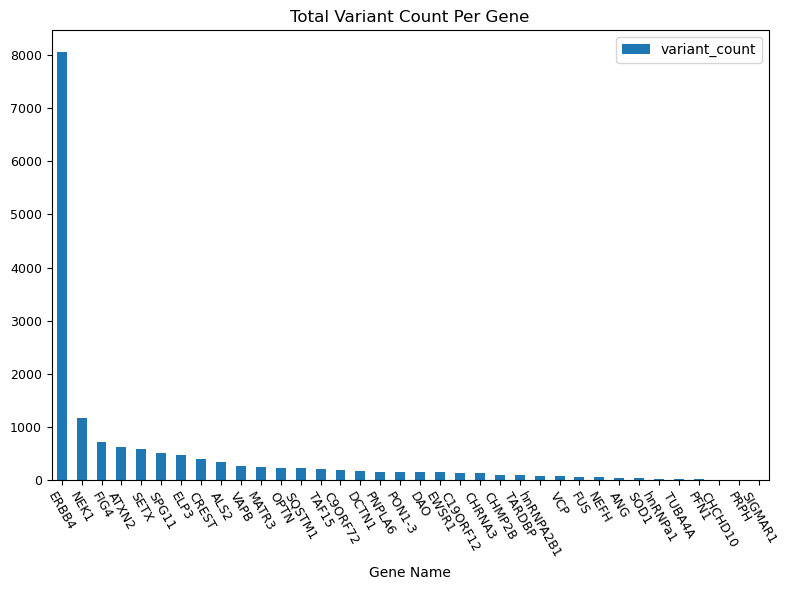

In [31]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [32]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'ATXN2', 'SETX']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [33]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [34]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [35]:
hdf.reset_index(inplace=True)

In [36]:
hdf.head()

,index,count
0,HG03136,2341
1,HG03193,2308
2,HG03343,2196
3,HG02973,2335
4,HG03105,2581


In [37]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(2312.47), 188.61293029574477)

## Find top and bottom genomes using mean & STD

In [38]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [39]:
len(top_genomes)

16

In [40]:
len(bottom_genomes)

17

In [41]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [42]:
sdf.head()

,HG03136,HG03193,HG03343,HG02973,HG03105,HG03132,HG02974,HG03279,HG03159,HG03198,...,HG03157,HG03123,HG03130,HG02947,HG02938,HG03135,HG03313,HG03270,HG03367,HG02941
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,55,4,46,42,10,20,34,4,17,35,...,12,33,22,11,7,14,47,27,23,6
ANG,4,5,3,9,4,1,4,5,9,9,...,6,4,5,11,5,4,13,9,5,8
ATXN2,25,112,161,177,166,21,19,168,183,16,...,151,166,162,20,166,166,168,163,155,10
C19ORF12,19,15,20,15,22,17,22,12,13,18,...,12,12,15,43,15,23,53,53,18,18
C9ORF72,32,28,3,24,25,26,27,17,32,18,...,29,12,35,27,30,34,14,17,11,38


In [43]:
tgdf= sdf.loc[top_genes]

In [44]:
tgdf_top_genomes = tgdf[top_genomes]

In [45]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [46]:
tgdf_top_genomes.head()

,HG03105,HG03111,HG03518,HG03199,HG02981,HG03304,HG03115,HG03300,HG03121,HG03190,HG03099,HG03189,HG03271,HG02922,HG03160,HG03130
gene,,,,,,,,,,,,,,,,
ERBB4,1518,1297,1547,1460,1487,1411,1369,1369,1537,1397,1206,1461,1540,1601,1237,1507
NEK1,216,311,313,323,274,231,226,208,230,235,319,211,229,319,327,187
FIG4,104,75,87,104,96,77,99,110,96,112,77,111,104,73,100,64
ATXN2,166,167,148,162,154,161,162,177,27,168,166,171,174,6,167,162
SETX,28,59,48,27,82,39,52,52,46,65,62,60,50,44,67,59


In [47]:
tgdf_bot_genomes.head()

,HG02952,HG03311,HG03265,HG03372,HG03499,HG03133,HG03303,HG03103,HG03163,HG03100,HG03298,HG03521,HG02946,HG03172,HG02947,HG03367,HG02941
gene,,,,,,,,,,,,,,,,,
ERBB4,1102,1048,1095,998,1066,1365,1325,1221,1060,1166,980,1163,1173,1196,1157,1036,1130
NEK1,317,225,226,52,212,221,34,55,212,36,105,274,55,69,245,220,228
FIG4,82,76,65,82,99,47,63,74,94,80,113,69,90,108,75,48,88
ATXN2,50,163,158,157,20,15,21,160,25,20,162,18,23,25,20,155,10
SETX,39,42,61,38,16,39,37,43,66,64,45,3,60,67,56,54,52


## Plot stacked bar chart for top genes & top genomes

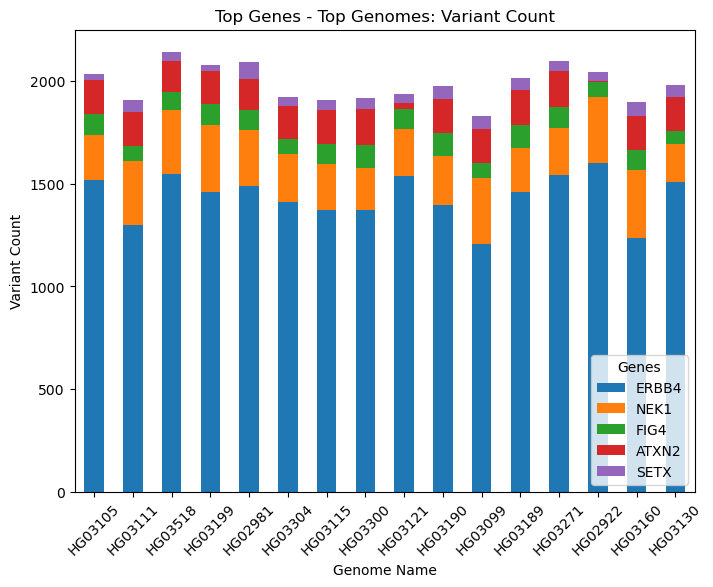

In [48]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

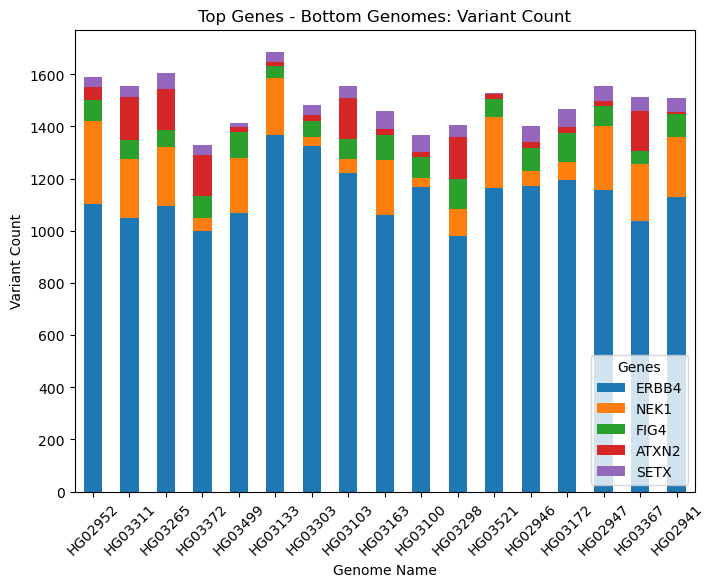

In [49]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()